In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm

In [3]:
data_dir = "/home/raraki/waves/projects/smap-drydown/data"
datarod_dir = "datarods"
anc_dir = "SMAP_L1_L3_ANC_STATIC"
anc_file = "anc_info.csv"
IGBPclass_file = "IGBP_class.csv"
ai_file = "AridityIndex_from_datarods.csv"

# Coordinate info

In [6]:
coord_info_file = "/home/raraki/waves/projects/smap-drydown/data/datarods/coord_info.csv"
coord_info = pd.read_csv(coord_info_file)
coord_info.head()

,id,latitude,EASE_row_index,longitude,EASE_column_index
0,0,83.63197,0,-179.81328,0
1,1,83.63197,0,-179.43983,1
2,2,83.63197,0,-179.06639,2
3,3,83.63197,0,-178.69295,3
4,4,83.63197,0,-178.31950,4


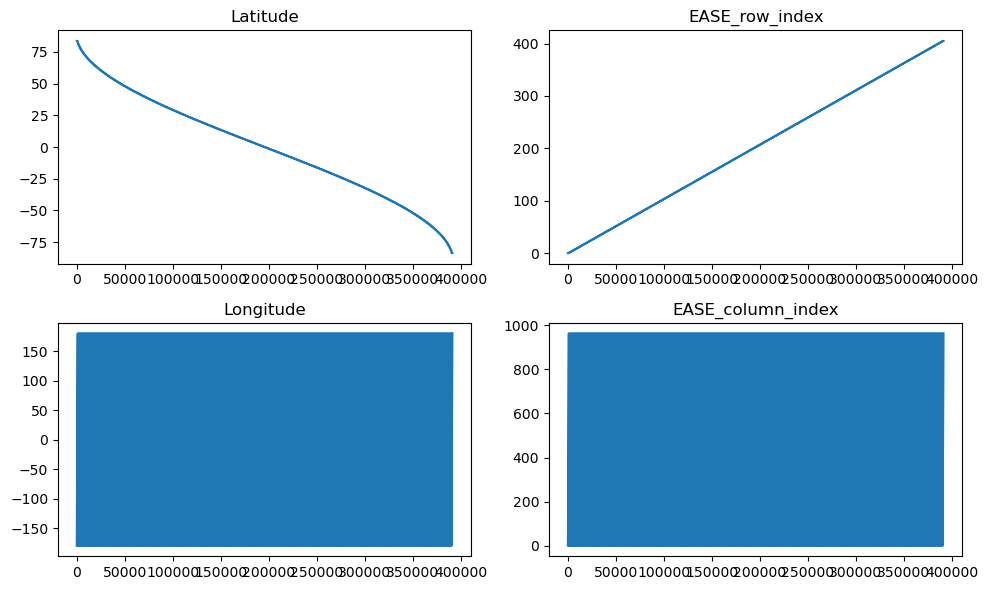

In [11]:
# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot each column in a separate subplot
coord_info['latitude'].plot(ax=axes[0, 0], title='Latitude')
coord_info['EASE_row_index'].plot(ax=axes[0, 1], title='EASE_row_index')
coord_info['longitude'].plot(ax=axes[1, 0], title='Longitude')
coord_info['EASE_column_index'].plot(ax=axes[1, 1], title='EASE_column_index')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

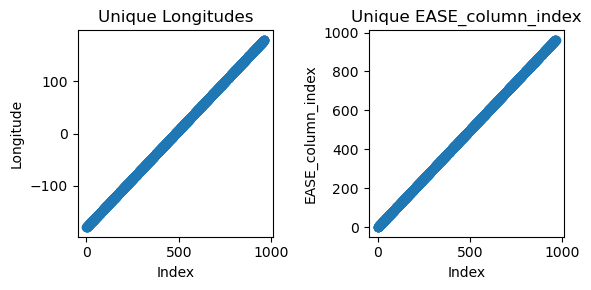

In [13]:
# Extract unique values from the 'longitude' and 'EASE_column_index' columns
unique_longitudes = coord_info['longitude'].unique()
unique_column_indices = coord_info['EASE_column_index'].unique()

# Create a subplot for the 'longitude' unique values
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.scatter(range(len(unique_longitudes)), unique_longitudes, marker='o')
plt.title('Unique Longitudes')
plt.xlabel('Index')
plt.ylabel('Longitude')

# Create a subplot for the 'EASE_column_index' unique values
plt.subplot(1, 2, 2)
plt.scatter(range(len(unique_column_indices)), unique_column_indices, marker='o')
plt.title('Unique EASE_column_index')
plt.xlabel('Index')
plt.ylabel('EASE_column_index')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Open water

In [16]:
file_path = os.path.join(
    data_dir, datarod_dir, "coord_open_water.csv"
)
coord_open_water = pd.read_csv(file_path)
subset = (
    pd.merge(
        coord_info,
        coord_open_water,
        on=["EASE_row_index", "EASE_column_index"],
        how="left",
        indicator=True,
    )
    .query('_merge == "left_only"')
    .drop(columns="_merge")
)
len(subset)

138368

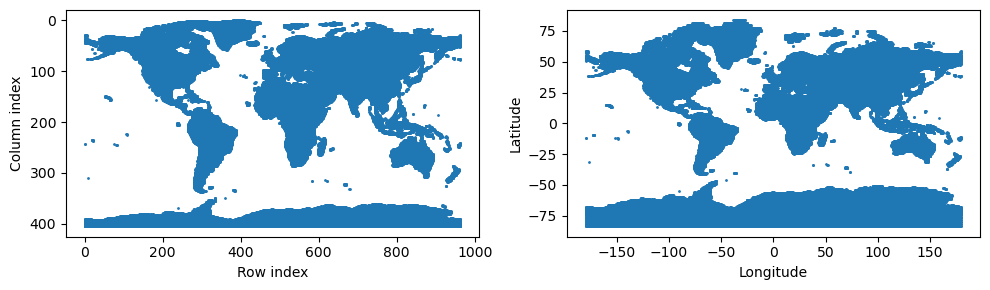

In [25]:
# Create a subplot for the 'longitude' unique values
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(subset.EASE_column_index, subset.EASE_row_index, marker='o', s=1)
plt.xlabel('Row index')
plt.ylabel('Column index')
plt.gca().invert_yaxis()

# Create a subplot for the 'EASE_column_index' unique values
plt.subplot(1, 2, 2)
plt.scatter(subset.longitude, subset.latitude, marker='o', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Import data in 

In [26]:
dir_name = f"raraki_2023-11-25_global_95asmax"
input_file = rf"/home/raraki/waves/projects/smap-drydown/output/{dir_name}/all_results.csv"
_df = pd.read_csv(input_file)
df = _df.merge(coord_info, on=['EASE_row_index', 'EASE_column_index'], how='left')

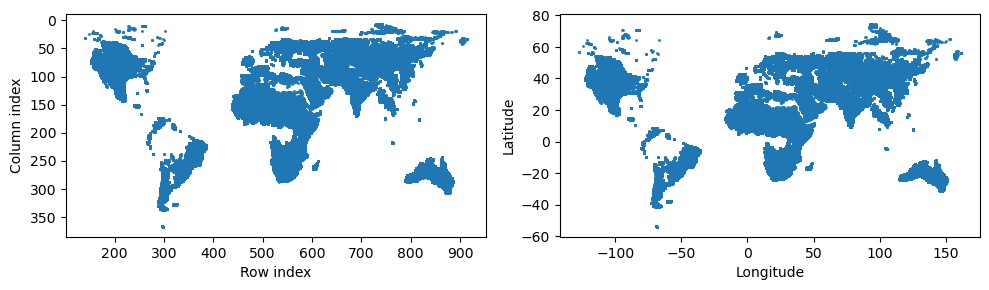

In [28]:
# Create a subplot for the 'longitude' unique values
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(df.EASE_column_index, df.EASE_row_index, marker='o', s=1)
plt.xlabel('Row index')
plt.ylabel('Column index')
plt.gca().invert_yaxis()

# Create a subplot for the 'EASE_column_index' unique values
plt.subplot(1, 2, 2)
plt.scatter(df.longitude, df.latitude, marker='o', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Filter data

In [44]:
# Define the bounding box coordinates
min_longitude = -30.717773
max_longitude = -4.9218752
min_latitude = 1.432617
max_latitude = 3.579213

# Filter the DataFrame to select rows within the bounding box
filtered_data = df[(df['latitude'] >= min_latitude) & (df['latitude'] <= max_latitude) &
                    (df['longitude'] >= min_longitude) & (df['longitude'] <= max_longitude)]

# Now, `filtered_data` contains the data within the specified bounding box.
filtered_data

,Unnamed: 0,EASE_row_index,EASE_column_index,event_start,event_end,time,sm,min_sm,max_sm,pet,...,exp_r_squared,exp_y_opt,q_k,q_q,q_delta_theta,q_r_squared,q_y_opt,id,latitude,longitude


In [45]:
print(len(filtered_data["q_q"]))
print(len(filtered_data["q_q"].unique()))

0
0
